In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def check_product_id(product_id, dataframe):
    return 1 if product_id in dataframe['variant_id'].values else 0

In [41]:
def make_corr_matrix_and_statictics(dataframe):
 
 dataframe_numeric = dataframe.select_dtypes(include=[np.number])
 corr_matrix = dataframe_numeric.corr()
 #  para obtener las estadísticas 
 print(dataframe_numeric.describe())
 # Crear un heatmap de las correlaciones
 sns.heatmap(corr_matrix, annot=True)
 plt.show()

In [42]:
def freq_encoding_vendor_product_type(dataframe):
# Calcular las frecuencias de aparición de cada categoría en 'vendor'
 vendor_freq = df_orders_combined_inventory['vendor'].value_counts() / len(df_orders_combined_inventory)

 # Calcular las frecuencias de aparición de cada categoría en 'product_type'
 product_type_freq = df_orders_combined_inventory['product_type'].value_counts() / len(df_orders_combined_inventory)

 # Mapear las frecuencias al DataFrame original
 df_orders_combined_inventory['vendor_freq'] = df_orders_combined_inventory['vendor'].map(vendor_freq)
 df_orders_combined_inventory['product_type_freq'] = df_orders_combined_inventory['product_type'].map(product_type_freq)

 # Ahora, df tiene dos nuevas columnas: 'vendor_freq' y 'product_type_freq' con la frecuencia codificada

In [43]:
 
def convert_unix_to_readable(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], unit='ms')
    return df

In [44]:
def hours_vs_orders_plot(dataframe,hours_feature_name):
 "contrastar diferentes horas con numero de oders"

 dataframe['hour_of_day'] = dataframe[hours_feature_name].dt.hour
 purchases_by_hour = dataframe.groupby('hour_of_day').size()
 df_purchases_by_hour = purchases_by_hour.reset_index(name='number_of_purchases')

 plt.figure(figsize=(14, 7))
 plt.bar(df_purchases_by_hour['hour_of_day'], df_purchases_by_hour['number_of_purchases'])
 plt.xlabel('Hour of Day')
 plt.ylabel('Number of Purchases')
 plt.title('Relationship between Hour of Day and Number of Purchases')
 plt.xticks(df_purchases_by_hour['hour_of_day'])
 plt.grid(True)
 plt.show() 

In [45]:
def dates_vs_orders_plot(dataframe,dates_feature_name):

 dataframe['year_month'] = dataframe[dates_feature_name].dt.to_period('M')
 purchases_by_month = dataframe.groupby('year_month').size()

 df_purchases_by_month = purchases_by_month.reset_index(name='number_of_purchases')

 plt.figure(figsize=(14, 7))
 plt.plot(df_purchases_by_month['year_month'].astype(str), df_purchases_by_month['number_of_purchases'], marker='o')
 plt.xlabel('Year-Month')
 plt.ylabel('Number of Purchases')
 plt.title('Monthly Number of Purchases Over Time')
 plt.xticks(rotation=90)
 plt.tight_layout()
 plt.grid(True)
 plt.show()

In [46]:
def count_nulls(dataframe, column_name):
    return dataframe[column_name].isna().sum()

In [53]:
def drop_rows_where_all_null(dataframe, columns):
    return dataframe.dropna(subset=columns, how='all')

In [52]:
def df_families_members_stats():

 # Filtramos el DataFrame para excluir filas donde cualquiera de los conteos es nulo
 df_filtered = df_users.dropna(subset=['count_adults', 'count_children', 'count_babies', 'count_pets'])

 # Filtramos df_filtered para eliminar filas donde 'count_adults' es 0 pero las otras columnas no son nulas
 df_filtered = df_filtered[~((df_filtered['count_adults'] == 0) & 
                            df_filtered['count_children'].notna() & 
                            df_filtered['count_babies'].notna() & 
                            df_filtered['count_pets'].notna())]

 # Calculamos el recuento total de familias después de filtrar
 total_families_filtered = len(df_filtered)

 # Calculamos el porcentaje de familias que tienen al menos un adulto, un niño, un bebé, etc.
 stats_percentage_of_families = {
    'families_with_adults': (df_filtered['count_adults'] > 0).sum() / total_families_filtered * 100,
    'families_with_children': (df_filtered['count_children'] > 0).sum() / total_families_filtered * 100,
    'families_with_babies': (df_filtered['count_babies'] > 0).sum() / total_families_filtered * 100,
    'families_with_pets': (df_filtered['count_pets'] > 0).sum() / total_families_filtered * 100
 }

 # Creamos una gráfica de barras para visualizar estos porcentajes
 plt.figure(figsize=(10, 6))
 bars = plt.bar(stats_percentage_of_families.keys(), stats_percentage_of_families.values(), color='skyblue')

 # Añadir etiquetas a cada barra
 for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

 plt.xlabel('Categoría')
 plt.ylabel('Porcentaje de familias (%)')
 plt.title('Porcentaje de Familias con Niños, Bebés y Mascotas (Excluyendo Nulos)')
 plt.ylim(0, 100)
 plt.show()

 # Imprimir recuentos para referencia
 print("Total de familias (excluyendo nulos):", total_families_filtered)
 print("Familias con adultos:", (df_filtered['count_adults'] > 0).sum())
 print("Familias con niños:", (df_filtered['count_children'] > 0).sum())
 print("Familias con bebés:", (df_filtered['count_babies'] > 0).sum())
 print("Familias con mascotas:", (df_filtered['count_pets'] > 0).sum())
 

In [47]:
df_inventory = pd.read_parquet('local_data/inventory.parquet')
df_orders = pd.read_parquet('local_data/orders.parquet')
df_abandoned = pd.read_parquet('local_data/abandoned_carts.parquet')
df_users = pd.read_parquet('local_data/users.parquet')

In [48]:
 #numero de compras por producto
 exploded_items = df_orders['ordered_items'].explode()
 item_counts = exploded_items.value_counts()
 item_counts_df_oders = item_counts.reset_index()
 item_counts_df_oders.columns = ['variant_id', 'number_of_orders']
 total_orders = len(df_orders)

 # prob de compra dividiendo por el número total de órdenes
 item_counts_df_oders['purchase_probability'] = item_counts_df_oders['number_of_orders'] / total_orders

 # Unir los DataFrames en la columna 'product_id'
 df_orders_combined_inventory= pd.merge(item_counts_df_oders, df_inventory, on='variant_id', how='inner')

 #make_corr_matrix_and_statictics(df_orders_combined_inventory)
 print(df_orders_combined_inventory.head()) 

       variant_id  number_of_orders  purchase_probability  price  \
0  34081589887108              4487              0.511456  10.79   
1  34284951863428              1133              0.129146   3.69   
2  34284950356100               954              0.108743   1.99   
3  34370361229444               939              0.107033   4.99   
4  33826465153156               884              0.100764   1.89   

   compare_at_price         vendor                     product_type  \
0             11.94          oatly       long-life-milk-substitutes   
1              3.99         plenty  toilet-roll-kitchen-roll-tissue   
2              3.00          fairy                      dishwashing   
3              5.50  whogivesacrap  toilet-roll-kitchen-roll-tissue   
4              1.99    clearspring              tins-packaged-foods   

                                        tags  
0                          [oat-milk, vegan]  
1                             [kitchen-roll]  
2  [discontinue, swappe

Aqui vemos como he calculado una purchase probability contando en numero de orders y dividiendo el numero de orders en que aparece cada articulo por este total

         variant_id  number_of_orders  purchase_probability        price  \
count  1.477000e+03       1477.000000           1477.000000  1477.000000   
mean   3.690916e+13         62.532837              0.007128     6.553785   
std    2.695602e+12        151.179244              0.017232     6.490753   
min    3.361529e+13          1.000000              0.000114     0.570000   
25%    3.427657e+13          9.000000              0.001026     2.890000   
50%    3.927260e+13         27.000000              0.003078     4.490000   
75%    3.946662e+13         71.000000              0.008093     7.990000   
max    4.015515e+13       4487.000000              0.511456    59.990000   

       compare_at_price  
count       1477.000000  
mean           7.316168  
std            7.071117  
min            0.750000  
25%            3.000000  
50%            4.990000  
75%            8.970000  
max           60.000000  


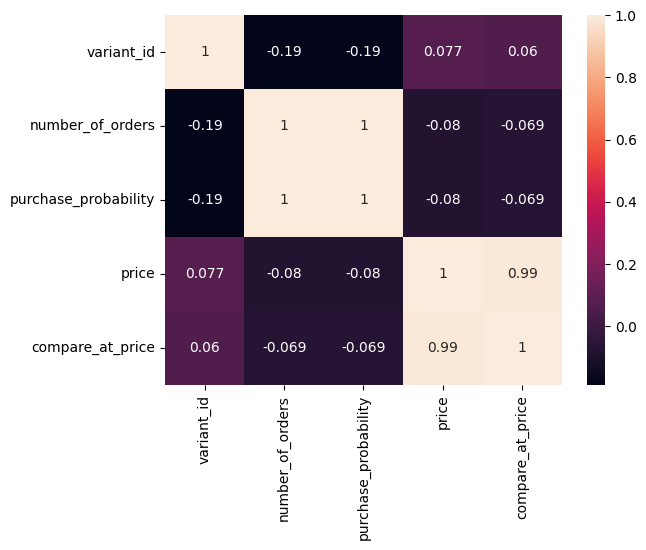

In [60]:
make_corr_matrix_and_statictics(df_orders_combined_inventory)

En esta corr matrix yo no veo mucho y seguramente sea debido a que habia muchos products ids que aparecian en orders pero no en el inventario por lo que ahi perdiamos mucha info a la hora de mergear ambis( opté por no usarlos)

         variant_id  number_of_orders  purchase_probability        price  \
count  1.477000e+03       1477.000000           1477.000000  1477.000000   
mean   3.690916e+13         62.532837              0.007128     6.553785   
std    2.695602e+12        151.179244              0.017232     6.490753   
min    3.361529e+13          1.000000              0.000114     0.570000   
25%    3.427657e+13          9.000000              0.001026     2.890000   
50%    3.927260e+13         27.000000              0.003078     4.490000   
75%    3.946662e+13         71.000000              0.008093     7.990000   
max    4.015515e+13       4487.000000              0.511456    59.990000   

       compare_at_price  vendor_freq  product_type_freq  
count       1477.000000  1477.000000        1477.000000  
mean           7.316168     0.006820           0.033772  
std            7.071117     0.007879           0.024450  
min            0.750000     0.000677           0.001354  
25%            3.000000  

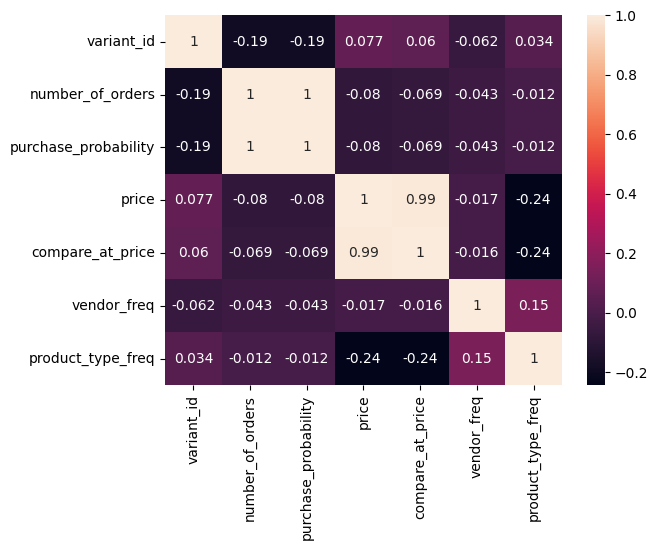

In [63]:
freq_encoding_vendor_product_type(df_orders_combined_inventory)
make_corr_matrix_and_statictics(df_orders_combined_inventory)

Aqui intente hacer un freq encoding con el vendedor y tipo de cada producto y   vemos una relaccio entre el tipo de producto y el precio asi como el tipo de producto y el vendor , ambas cosas tienen sentido

               id                                            user_id  \
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
20  2204707520644  bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...   
21  2204838822020  329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...   
34  2208967852164  f6451fce7b1c58d0effbe37fcb4e67b718193562766470...   
49  2215889436804  68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...   

            created_at order_date  user_order_seq  \
10 2020-04-30 14:32:19 2020-04-30               1   
20 2020-04-30 17:39:00 2020-04-30               1   
21 2020-04-30 18:12:30 2020-04-30               1   
34 2020-05-01 19:44:11 2020-05-01               1   
49 2020-05-03 21:56:14 2020-05-03               1   

                                        ordered_items  
10  [33618849693828, 33618860179588, 3361887404045...  
20  [33618835243140, 33618835964036, 3361886244058...  
21  [33618891145348, 33618893570180, 3361889766618...  
34  [33618830196868, 336

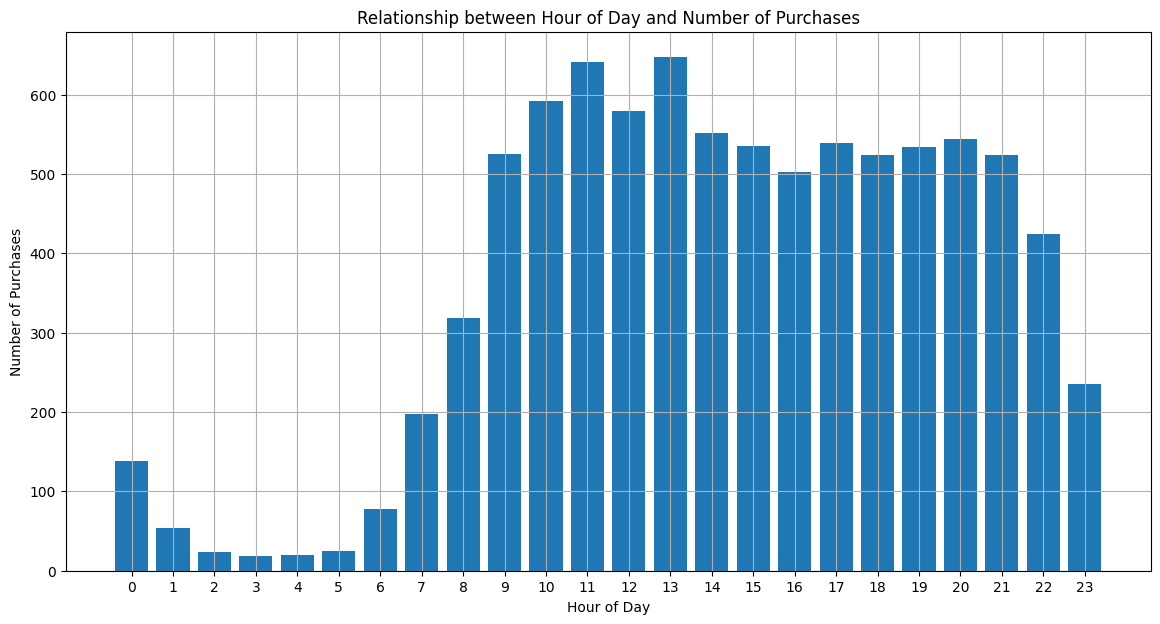

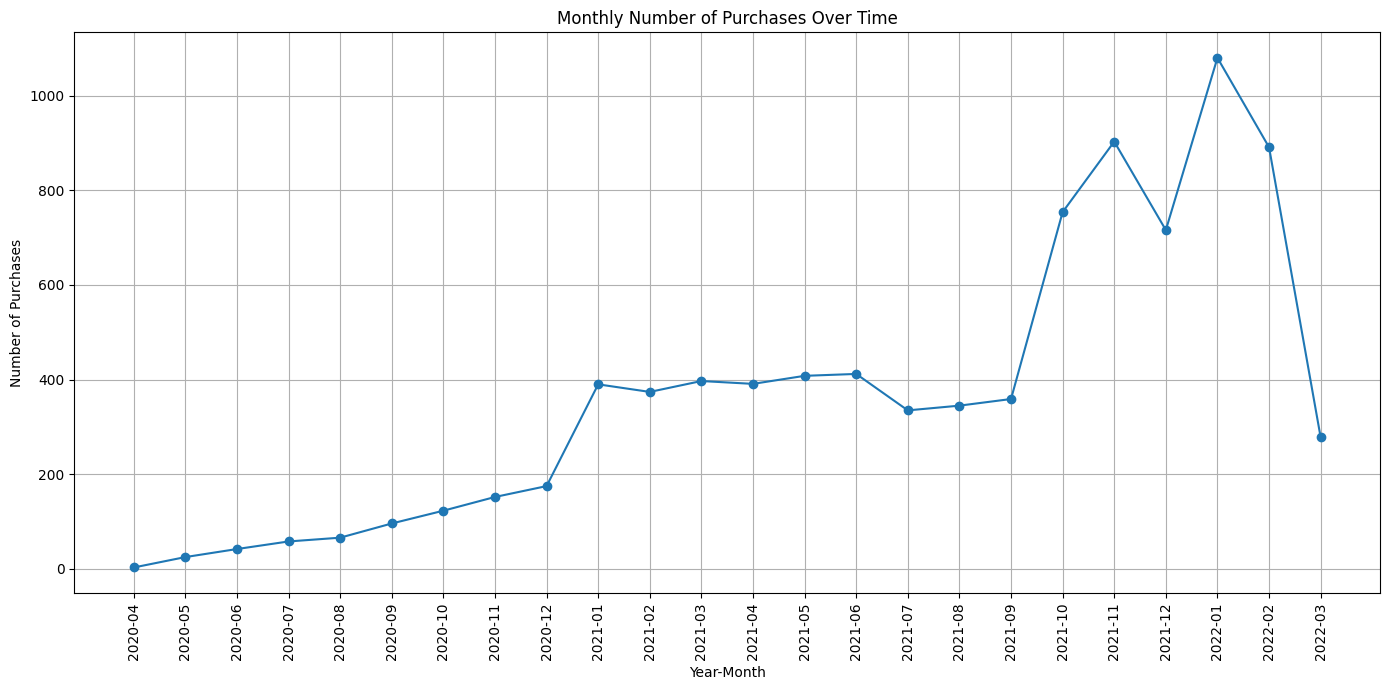

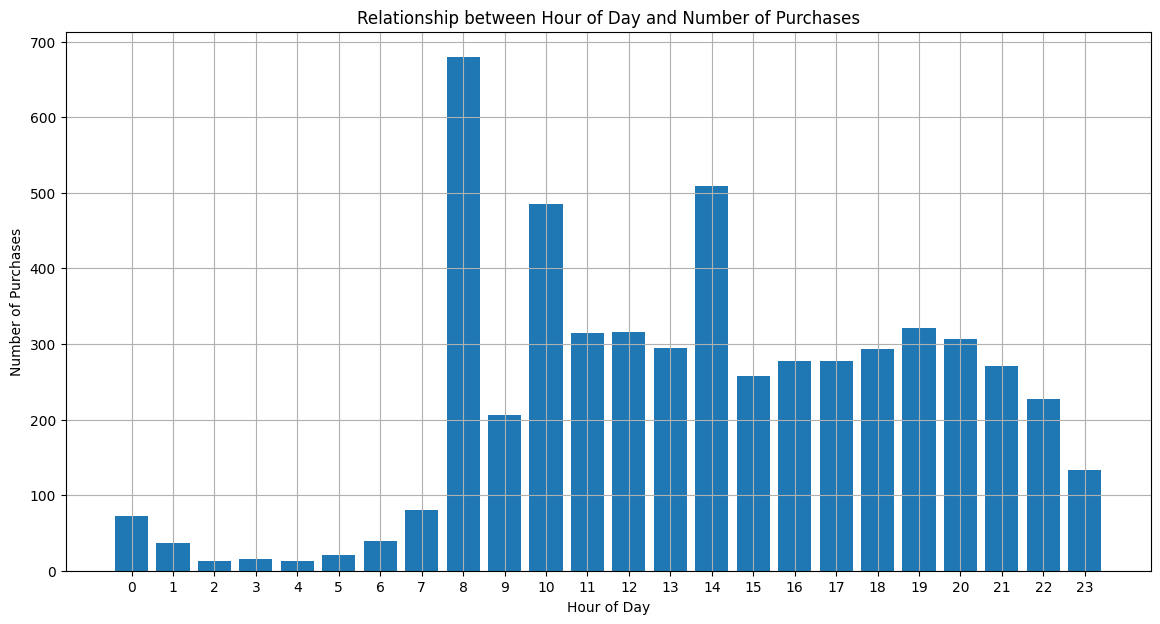

In [49]:
df_orders = convert_unix_to_readable(df_orders, 'created_at')
df_orders = convert_unix_to_readable(df_orders, 'order_date')
print(df_orders.head())

hours_vs_orders_plot(df_orders,'created_at')
dates_vs_orders_plot(df_orders,'order_date')
hours_vs_orders_plot(df_abandoned,'created_at')


haciendo uso de las funciones  hours_vs_orders_plot y dates_vs_orders_plot podemos 
observar los graficos que nos muestran en numero de orders por hora del dia , el numerod de pedidos por mes y año, y el numeros de carritos abandonados por hora del dia respectivamente.

En el primer grafico podemos comprobar la hipostesis de que se hacen mas orders durante el dia que durante la noche (lo cual era de esperar) pero tambien podemos ver que se hacen mas por la mañana que por la tarde

En el segundo vemos que en el mes de enero ha subido mucho el numero de orders ( en los dos ultimos años ), que el primer año fue lineal el crecimiento de el numero de orders y vemos una gran caida en marzo de 2022 pero al ser el ultimo mes seguramente sea porque no ha finalizado todavia y quedan futuros pedidos por contabilizar

En el ultimo grafico vemos pico de abandono a las 8 ,10 y 14. Asi de primeras se me ocurre que puede ser por que el cliente esta haciendo su compra justo antes de otra actividad importante (irse a trabajar , comer) por lo que se le echa el tiempo encima y deja a medias su order.

In [54]:
 # Columnas a verificar
 columns_to_check = ['count_people', 'count_adults', 'count_children', 'count_babies', 'count_pets']
 df_cleaned = drop_rows_where_all_null(df_users, columns_to_check)
 
 print(count_nulls(df_users,'count_people'))
 print(df_users['count_people'].size)

 print(count_nulls(df_cleaned,'count_people'))
 print(df_cleaned['count_people'].size)
 

4658
4983
0
325


aqui podemos ver que de todo nuestro dataset de 4983 usuarios solo 325 completaron algun campo acerca de los miembros de su familia, por ende solo usaremos los que si estan completos para su posterior estudio


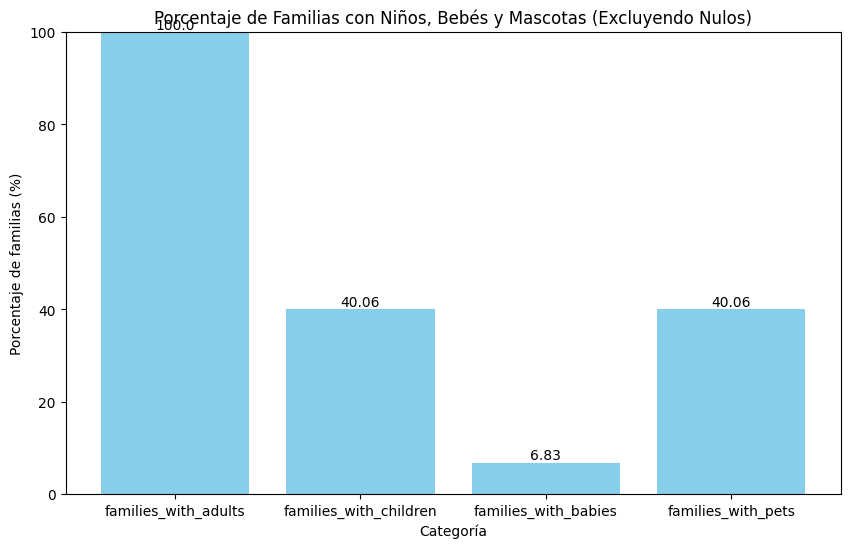

Total de familias (excluyendo nulos): 322
Familias con adultos: 322
Familias con niños: 129
Familias con bebés: 22
Familias con mascotas: 129


In [55]:
df_families_members_stats()

Notese que habia 3 casos de familias sin un adulto que han sido consideradas como errores ya que una mascota no ha hecho ningun pedido.
Excluyendo estos 3 casos vemos muchas familias tienen niños y mascotas pero no tantas tienen bebes
Con esta informacion podriamos aumentar el numero de productos para estos grupos y no añadir productos para bebes a nuestro inventario

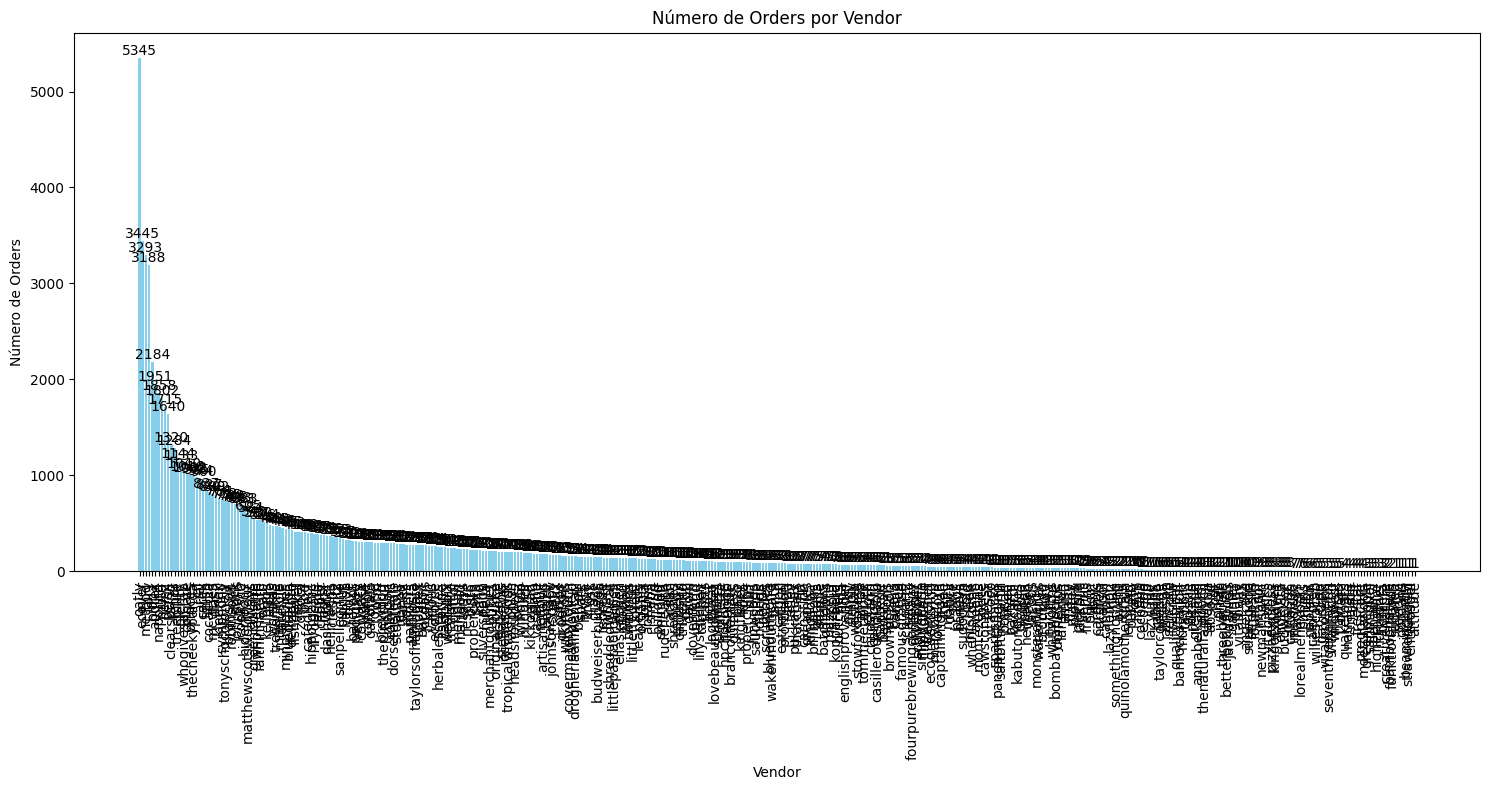

In [57]:
  # Código para generar el gráfico de recuento de orders por vendor
vendor_order_counts = df_orders_combined_inventory.groupby('vendor')['number_of_orders'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))  # Aumentamos el tamaño de la figura
vendor_bars = plt.bar(vendor_order_counts.index, vendor_order_counts.values, color='skyblue')
plt.xlabel('Vendor')
plt.ylabel('Número de Orders')
plt.title('Número de Orders por Vendor')
plt.xticks(rotation=90)  # Rotamos las etiquetas 90 grados para evitar superposición
for bar in vendor_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom')
plt.tight_layout()  # Ajustamos el layout para que no cortemos las etiquetas
plt.show()

podemos ver que este grafico es horrible porque hay demasiados vendor , seria mas conveniente hacer una lista y sacar los datos en grupos de menor cantidad ( los 10 mas vendidos , los 10 menos etc), se mejorara en futuras versiones pero quiero hacer la pull para hoy.

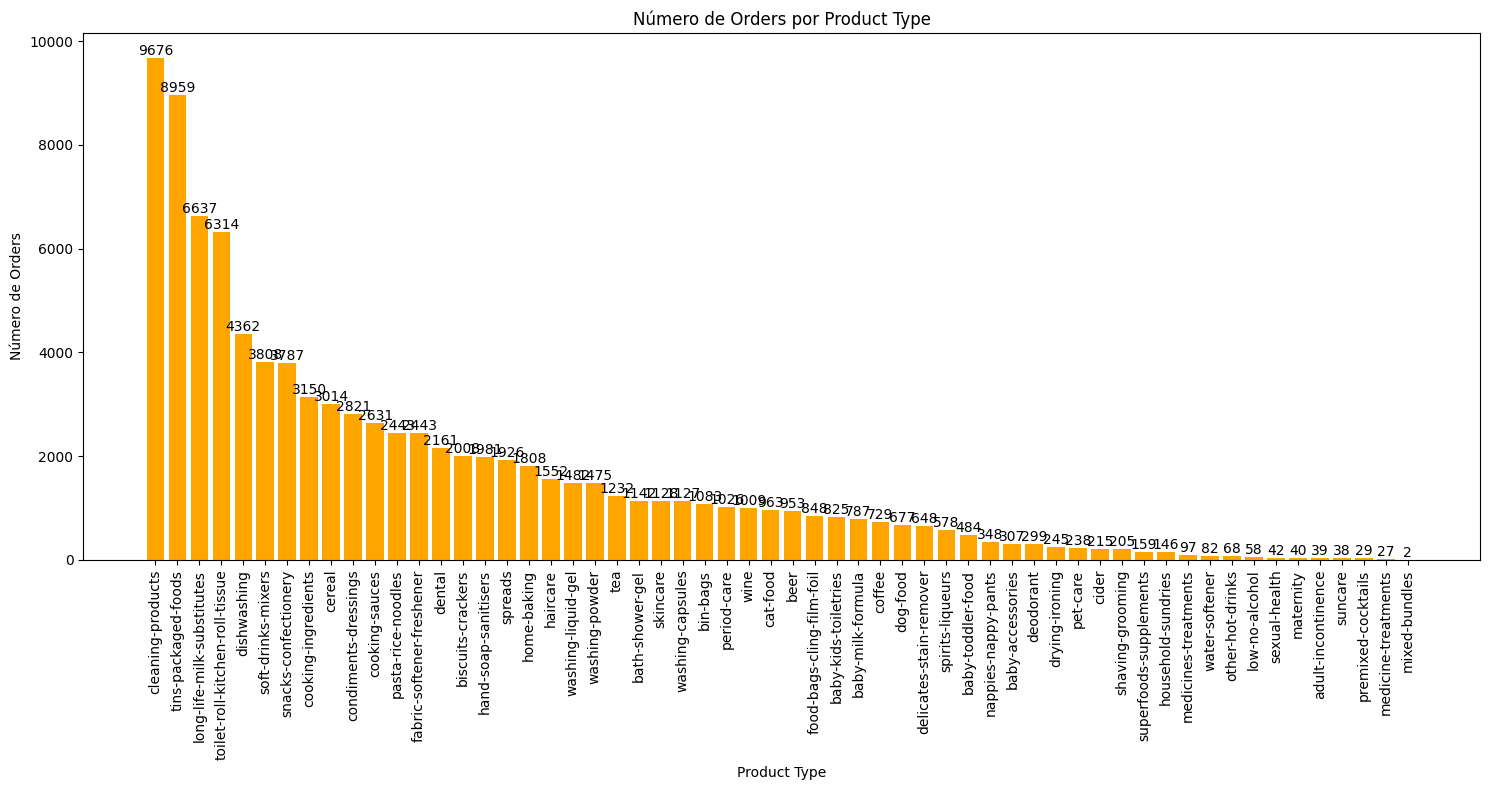

In [59]:
 # Código para generar el gráfico de recuento de orders por product type
 product_type_order_counts = df_orders_combined_inventory.groupby('product_type')['number_of_orders'].sum().sort_values(ascending=False)
 plt.figure(figsize=(15, 8))  # Aumentamos el tamaño de la figura
 product_type_bars = plt.bar(product_type_order_counts.index, product_type_order_counts.values, color='orange')
 plt.xlabel('Product Type')
 plt.ylabel('Número de Orders')
 plt.title('Número de Orders por Product Type')
 plt.xticks(rotation=90)  # Rotamos las etiquetas 90 grados para evitar superposición
 for bar in product_type_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom')
 plt.tight_layout()  # Ajustamos el layout para que no cortemos las etiquetas
 plt.show()

Este grafico nos muestra cada tipo de producto con su respectivo numero de pedidos,
en este caso el grafico es aceptable , pudiendo ver que los productos de limpiezan estan petandolo 